*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links:
- [Matrix Differentiation (EN)](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
- [Матричные вычисления (RU)](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)

## Exercise 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = 
$$ 

$$ 
\frac{d}{dx} x^{T}Ax=(A+ A^{T})x
$$

$$ 
\frac{d}{dx} x^{T}x=\frac{d}{dx} x^{T}Ex=(E+ E^{T})x=2x
$$


## Exercise 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} =
$$

$$
tr(AB) = \sum_{i=1}^{N}a_{1i}b_{i1} + \sum_{i=1}^{N}a_{2i}b_{i2} + \dots + \sum_{i=1}^{N}a_{Ni}b_{iN}
$$
$$
\frac{∂tr(AB)}{∂a_{ij}} = b_{ji}
$$
$$
\frac{dy}{dA} = B^{\mathrm{T}}
$$

## Exercise 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$ 

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

$$  
y = x^TAc = \sum_{i=1}^{N}\sum_{j=1}^{N}x_{i}A_{ij}c_{j}
$$

$$  
\frac{dy}{dx_k} = \sum_{j=1}^{N}A_{kj}c_{j}
$$

$$
\frac{dy}{dx} = Ac
$$

$$
\frac{dy}{dA_{ij}} = \frac{d}{dA_{ij}}\sum_{k=1}^{N}\sum_{l=1}^{N}x_k A_{kl} c_l = x_i c_j
$$

$$
\frac{dy}{dA} = xc^T
$$

## Exercise 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ? 
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="grad.png">

(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} =  
$$ 
and 
$$
\frac{dF}{dS} =  
$$ 
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$ 

$$
J = tr((X-AS)^T(X-AS)) = tr((X^T-S^T A^T)(X-AS)) = \newline
tr(X^T X) - 2tr(X^T AS) + tr(S^T A^T AS)
$$

$$
\frac{dJ}{dS} = -2A^T X + 2A^T AS = 2A^T(AS-X)
$$

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*
*  Outliers 
*  Due to the lack of such a sample in the test data.



### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*
1, 2, 3

*Your Explanation:*
1. It will not impact the distances.
2. The same applies here.
3. It will not any affect. Cause if $d_1 < d_2$ in this case providing this procedure we will get $d_1/\sigma  < d_2/\sigma$. Where $d_1$ and $d_2$ are distances.
4. L1 distances are not kept. Re-group pixels and will get another pixel-wise mean.
5. L1 distances are not kept with operation like this with Rotation matrix
   $$(x^2, y^2) = Rotate (x, y)$$ 


## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:* 2, 4


*Your Explanation:*
1. It is not linear, at least not for the Iris dataset.
2. The error will be zero for 1NN, but it could be higher for k > 1NN. However, zero is a lower bound.
3. There's a counterexample: consider the training set [-17, 0], [-3, 0], [30, 0], [-1, 0], [-2, 0], [5, 1]. For a new sample [3, 0], the test error will be 100% for 1NN but 0 for 5NN.
4. kNN requires all training data to classify a new sample.

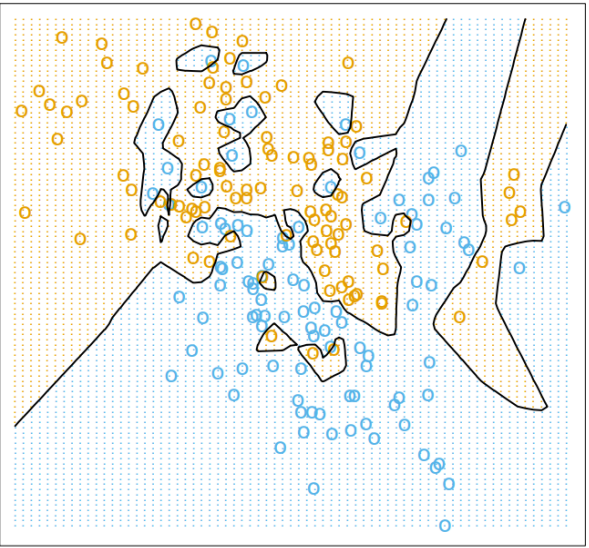
